In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
rainfall_data = pd.read_excel('D:\\Intern\\WECS_raw_combined.xlsx','filter', parse_dates = True)

In [3]:
rainfall_data

,Date,101,102,103,104,105,106,107,108
0,1980-01-01,0.8,7.5,0.0,0.0,0.0,0.0,0.0,7.0
1,1980-01-02,0.0,2.6,0.2,6.8,4.2,3.5,33.0,8.4
2,1980-01-03,0.0,0.0,0.0,9.4,2.0,0.0,0.0,0.0
3,1980-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1980-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14145,2018-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14146,2018-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14147,2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14148,2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from datetime import datetime, date
rainfall_data['Date'] = pd.to_datetime(rainfall_data['Date'])
rainfall_data.set_index('Date',inplace = True)

In [5]:
rainfall_data = rainfall_data.loc['1980-01-01':'2017-12-31']

In [6]:
original_data = rainfall_data

In [7]:
stations = []
for station in rainfall_data.columns:
    station_id = station
    stations.append(station_id)

In [8]:
stations

[101, 102, 103, 104, 105, 106, 107, 108]

In [9]:
rainfall_data.isna().sum()

101      91
102     214
103      29
104       0
105    2271
106       0
107       0
108      30
dtype: int64

In [10]:
#take 104 as target station 
#exclude 105 and take remaining other stations as input features
rainfall_data.columns = rainfall_data.columns.astype(str)

In [11]:
rainfall_data.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')

In [12]:
rainfall_data = rainfall_data.drop(columns = ['105'])

In [13]:
rainfall_data

,101,102,103,104,106,107,108
Date,,,,,,,
1980-01-01,0.8,7.5,0.0,0.0,0.0,0.0,7.0
1980-01-02,0.0,2.6,0.2,6.8,3.5,33.0,8.4
1980-01-03,0.0,0.0,0.0,9.4,0.0,0.0,0.0
1980-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2017-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
rainfall_data.dropna(inplace = True)

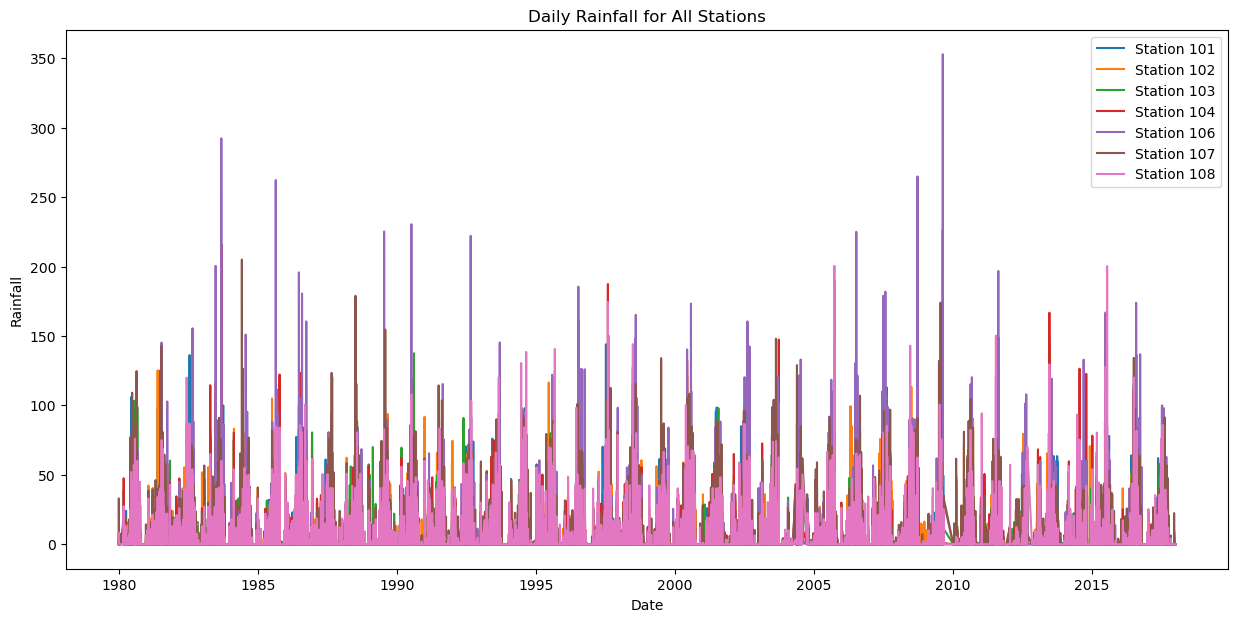

In [15]:
#Plotting the time-series data for all stations on a single graph
plt.figure(figsize=(15, 7))

for column in rainfall_data.columns:
    plt.plot(rainfall_data.index, rainfall_data[column], label=f'Station {column}')

plt.title('Daily Rainfall for All Stations')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

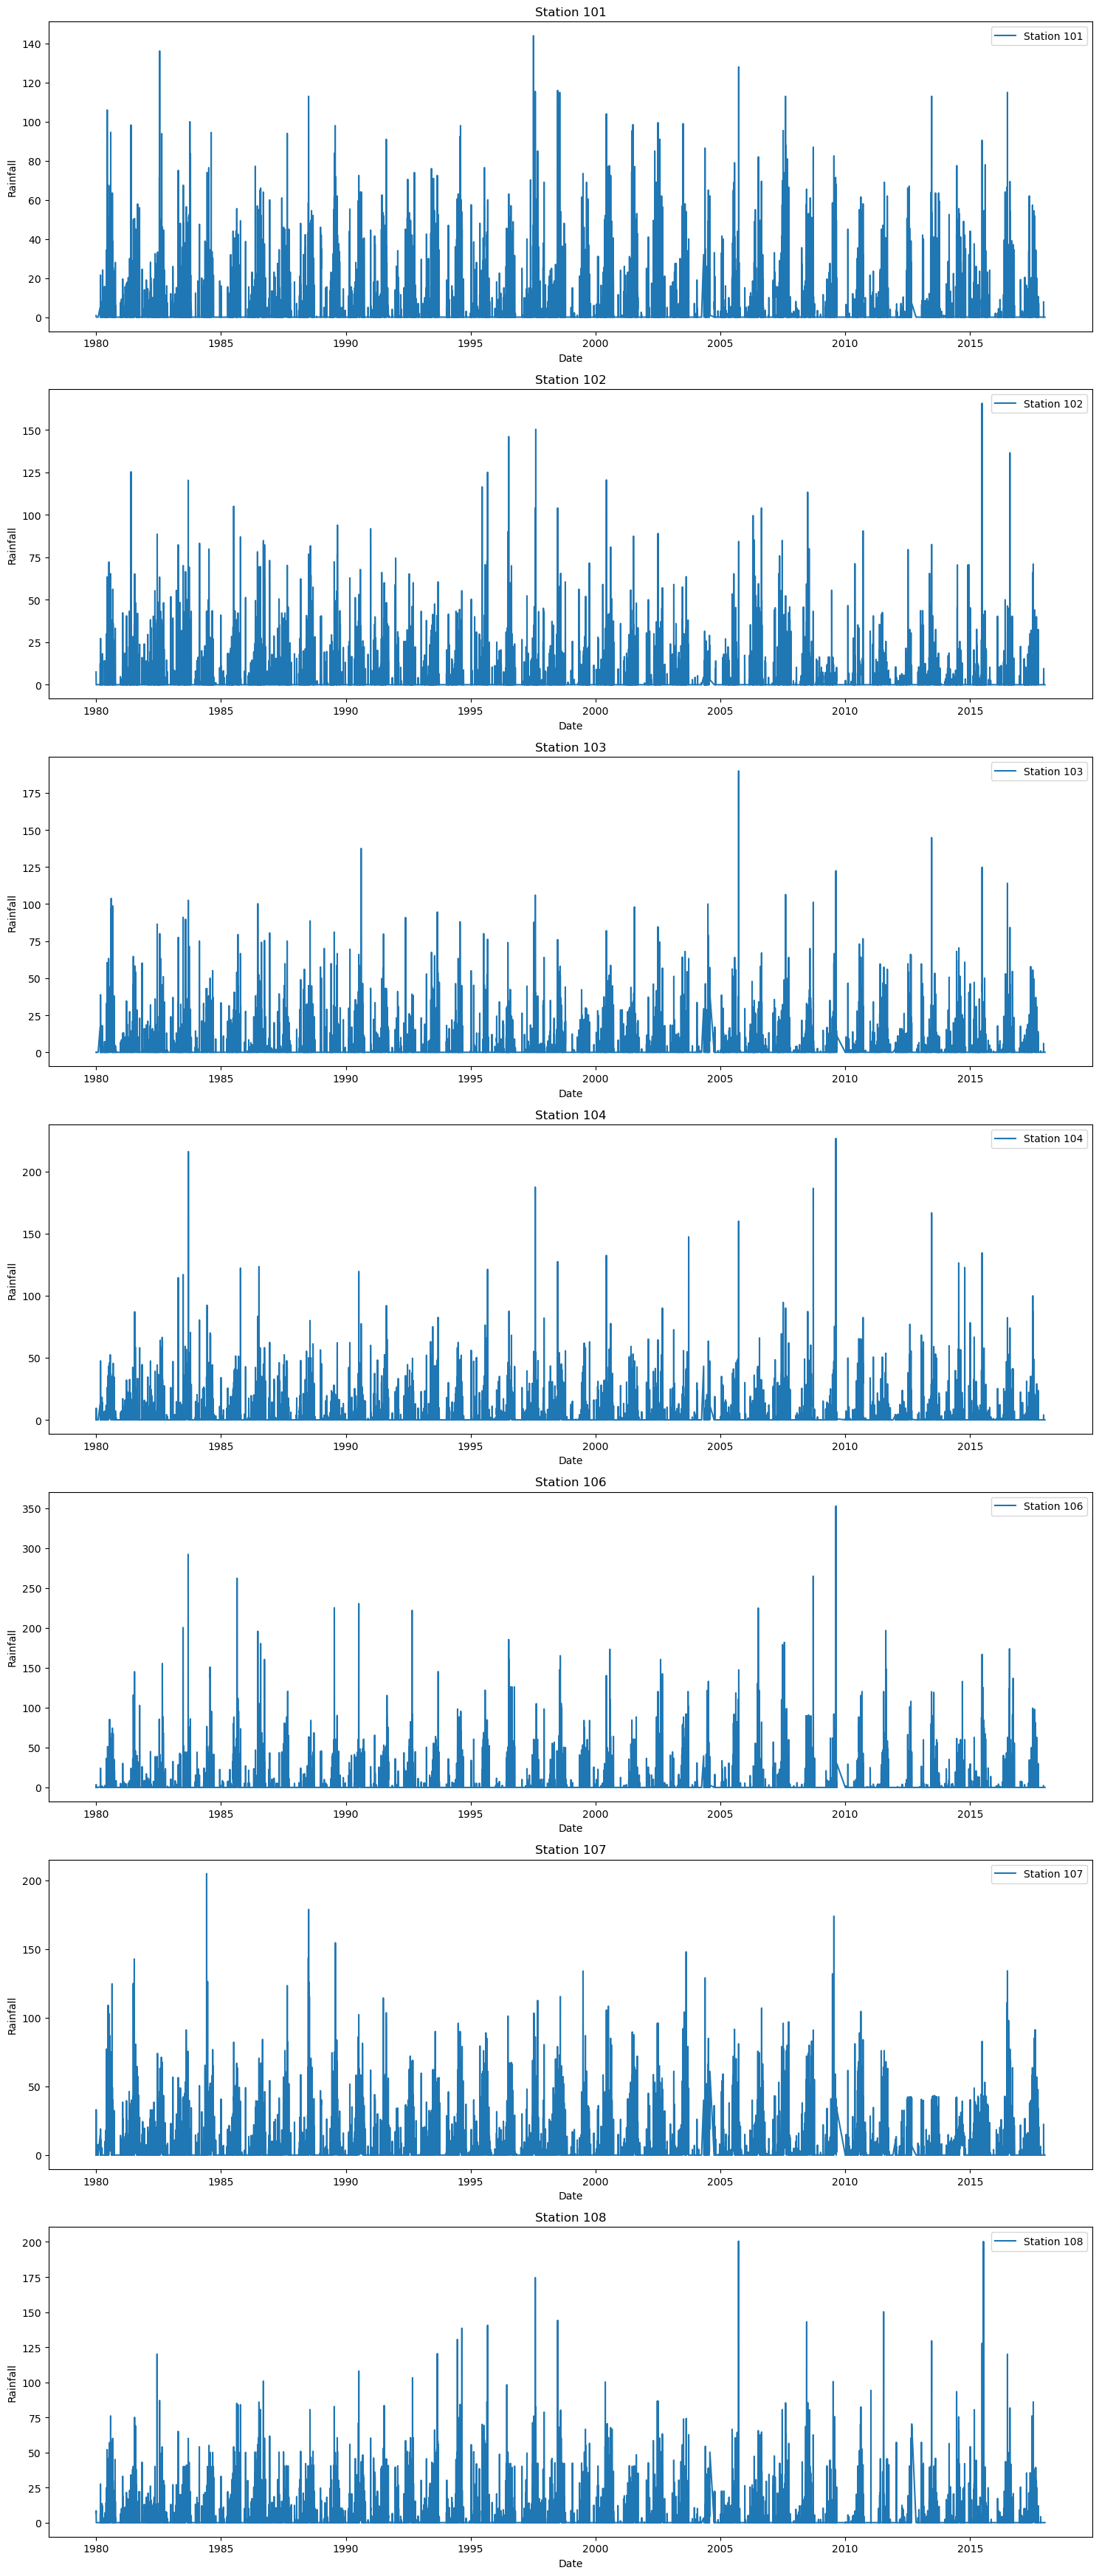

In [16]:
num_stations = rainfall_data.shape[1]

fig, axes = plt.subplots(nrows=num_stations, ncols=1, figsize=(15, 5 * num_stations))

# Plotting the time-series data for each station in a separate subplot
for i, column in enumerate(rainfall_data.columns):
    axes[i].plot(rainfall_data.index, rainfall_data[column], label=f'Station {column}')
    axes[i].set_title(f'Station {column}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Rainfall')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [15]:
#Encoding the cyclical properties of time
def date_features(df, inplace=False):
    if not inplace:
        df = df.copy()
    df.index = pd.to_datetime(df.index)
    df['day_sin'] = np.sin(df.index.dayofyear*(2.*np.pi/365))
    df['day_cos'] = np.cos(df.index.dayofyear*(2.*np.pi/365))
    df['month_sin'] = np.sin(df.index.month*(2.*np.pi/12))
    df['month_cos'] = np.cos(df.index.month*(2.*np.pi/12))
    if not inplace:
        return df

In [16]:
date_features(rainfall_data, inplace = True)

In [17]:
rainfall_data

,101,102,103,104,106,107,108,day_sin,day_cos,month_sin,month_cos
Date,,,,,,,,,,,
1980-01-01,0.8,7.5,0.0,0.0,0.0,0.0,7.0,1.721336e-02,0.999852,5.000000e-01,0.866025
1980-01-02,0.0,2.6,0.2,6.8,3.5,33.0,8.4,3.442161e-02,0.999407,5.000000e-01,0.866025
1980-01-03,0.0,0.0,0.0,9.4,0.0,0.0,0.0,5.161967e-02,0.998667,5.000000e-01,0.866025
1980-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.880243e-02,0.997630,5.000000e-01,0.866025
1980-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.596480e-02,0.996298,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.880243e-02,0.997630,-2.449294e-16,1.000000
2017-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.161967e-02,0.998667,-2.449294e-16,1.000000
2017-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.442161e-02,0.999407,-2.449294e-16,1.000000


In [63]:
target = rainfall_data['104'].values.flatten()
features = rainfall_data.drop(columns=['104'])
#'year','month']]

In [64]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

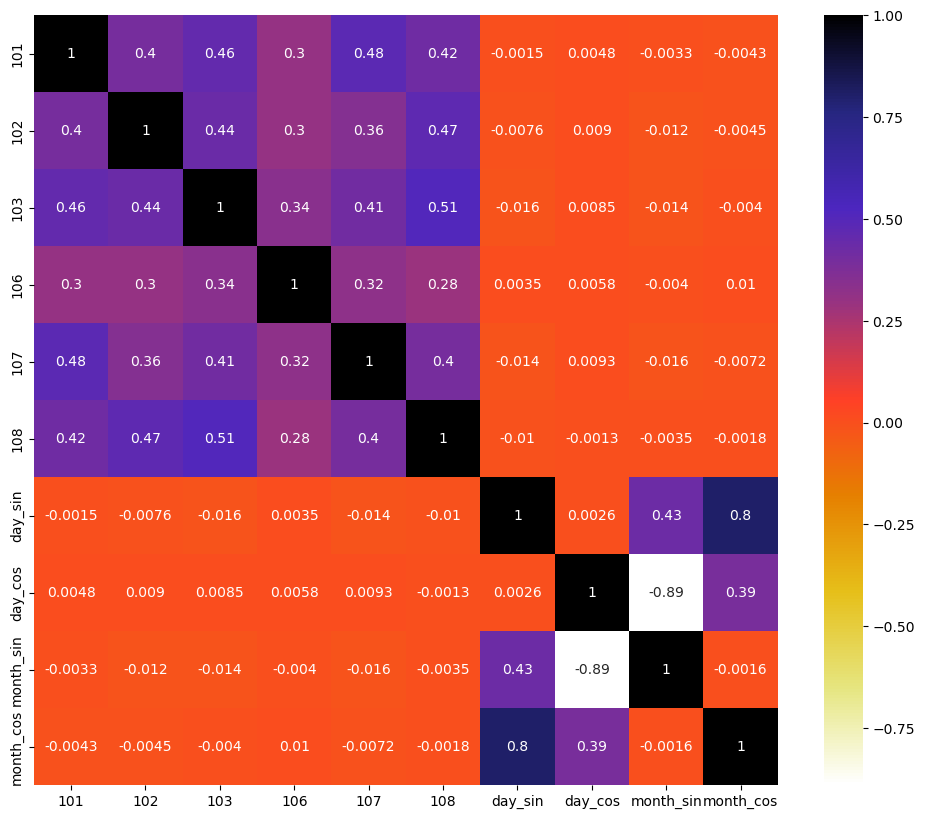

In [19]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor= X_train.corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)
plt.show()

In [65]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
X_train, X_test

(array([[0.        , 0.        , 0.        , ..., 0.93897891, 0.75      ,
         0.9330127 ],
        [0.        , 0.12109115, 0.        , ..., 0.05895856, 0.5       ,
         0.        ],
        [0.02349486, 0.        , 0.        , ..., 0.34139216, 0.        ,
         0.5       ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.76353447, 0.25      ,
         0.9330127 ],
        [0.20190896, 0.01530273, 0.05374078, ..., 0.04033924, 0.5       ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.99814905, 0.5       ,
         1.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.34139216, 0.9330127 ,
         0.25      ],
        [0.        , 0.        , 0.        , ..., 0.62974904, 0.0669873 ,
         0.75      ],
        [0.06093979, 0.        , 0.        , ..., 0.8324246 , 0.9330127 ,
         0.75      ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.80593961, 0.25      ,
         0.9330127 ],
        [0. 

In [24]:
def logsigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Build the ANN model
model = Sequential([
    Dense(100, input_dim=X_train.shape[1], activation='relu'), #kernel_regularizer=regularizers.l2(0.01)),
    #Dropout(0.2),
   # Dense(128, activation='relu'), #kernel_regularizer=regularizers.l2(0.01)),
    #Dropout(0.2),
    #Dense(32, activation='relu'), #kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='relu'), #kernel_regularizer=regularizers.l2(0.01)),
    Dense(1)
])

In [68]:
#opt = tf.keras.optimizers.Adam(clipvalue=1.0)
#opt = Adam(learning_rate = 0.0001)
model.compile(optimizer='adam', loss='mse')

In [69]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
867/867 [==============================] - 5s 4ms/step - loss: 112.2054 - val_loss: 70.8812
Epoch 2/30
867/867 [==============================] - 3s 3ms/step - loss: 74.2817 - val_loss: 59.2607
Epoch 3/30
867/867 [==============================] - 2s 3ms/step - loss: 67.0949 - val_loss: 59.5638
Epoch 4/30
867/867 [==============================] - 3s 3ms/step - loss: 64.7850 - val_loss: 57.3871
Epoch 5/30
867/867 [==============================] - 3s 3ms/step - loss: 63.6372 - val_loss: 57.2639
Epoch 6/30
867/867 [==============================] - 2s 3ms/step - loss: 62.8084 - val_loss: 58.4295
Epoch 7/30
867/867 [==============================] - 3s 3ms/step - loss: 61.9510 - val_loss: 57.8895
Epoch 8/30
867/867 [==============================] - 3s 3ms/step - loss: 61.7274 - val_loss: 56.5282
Epoch 9/30
867/867 [==============================] - 3s 3ms/step - loss: 61.4217 - val_loss: 56.7169
Epoch 10/30
867/867 [==============================] - 5s 5ms/step - loss: 61.052

In [70]:
predicted_ppt = model.predict(scaler.transform(features))

424/424 [==============================] - 1s 3ms/step


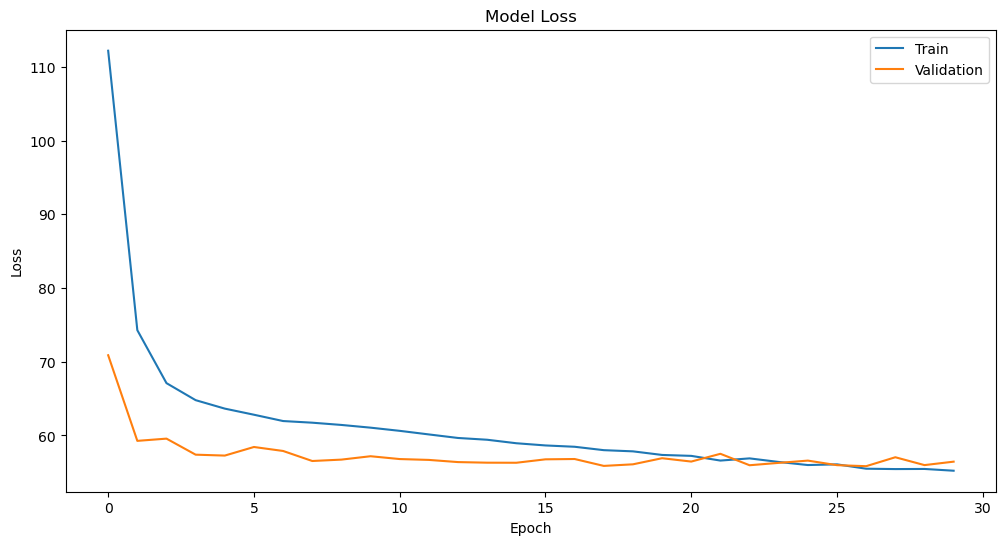

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [72]:
#y_test_inv = y_test.values
predicted_ppt_inv = predicted_ppt.flatten()

In [73]:
loss = model.evaluate(X_test,y_test)

85/85 [==============================] - 0s 2ms/step - loss: 57.1846


In [74]:
print(y_test.index)
print(y_test_inv)
print(predicted_ppt_inv)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [75]:
target

array([0. , 6.8, 9.4, ..., 0. , 0. , 0. ])

In [76]:
predicted_ppt_inv

array([ 0.42595664,  6.3633356 , -1.232855  , ..., -1.46515   ,
       -1.4689137 , -1.4732622 ], dtype=float32)

In [77]:
result_df = pd.DataFrame({
    'Date': rainfall_data.index,
    'Actual': target,
    'Predicted': predicted_ppt_inv
})

In [78]:
result_df

,Date,Actual,Predicted
0,1980-01-01,0.0,0.425957
1,1980-01-02,6.8,6.363336
2,1980-01-03,9.4,-1.232855
3,1980-01-04,0.0,-1.239536
4,1980-01-05,0.0,-1.246798
...,...,...,...
13541,2017-12-27,0.0,-1.459391
13542,2017-12-28,0.0,-1.461978
13543,2017-12-29,0.0,-1.465150
13544,2017-12-30,0.0,-1.468914


In [79]:
# Filter data from 1980 to 1985
mask = (result_df['Date'] >= '1980-01-01') & (result_df['Date'] <= '1985-12-31')
df_filtered = result_df.loc[mask]

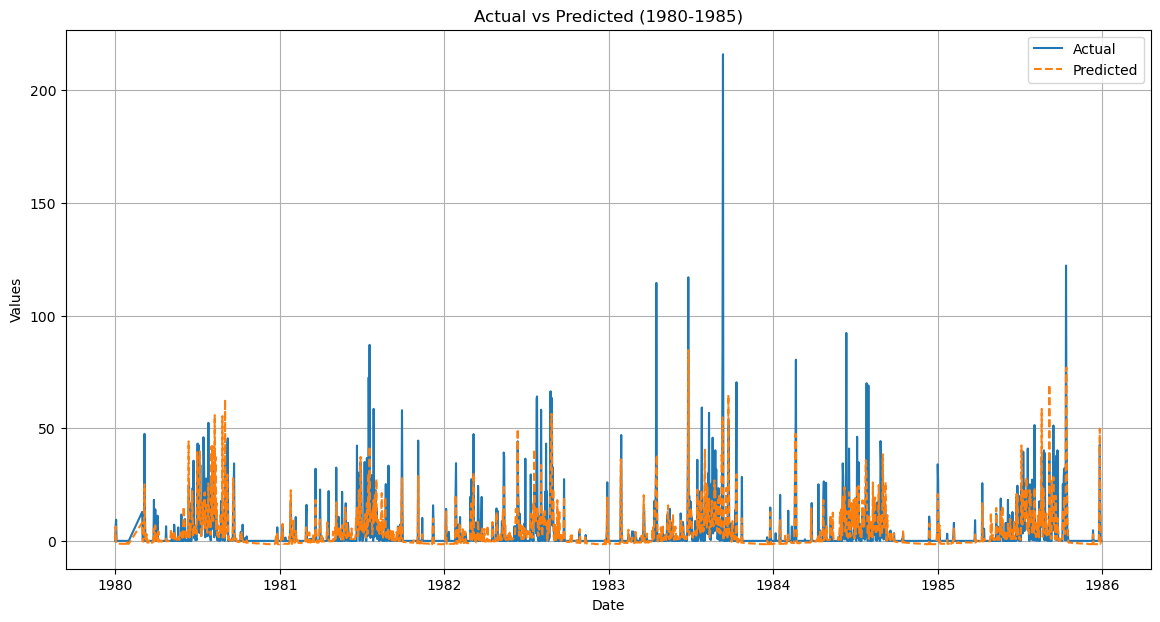

In [80]:
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Date'], df_filtered['Actual'], label='Actual')
plt.plot(df_filtered['Date'], df_filtered['Predicted'], label='Predicted', linestyle='--')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted (1980-1985)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
result_df.to_excel('result_ann_sample.xlsx')